# Explore here

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import xgboost as xgb
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import joblib
import pickle
import os

# Cargar datos

In [122]:
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Análisis exploratorio

In [123]:
# Revisión de columnas y la identificación de nulos
print(f'Este dataframe contiene {df.shape[0]} y {df.shape[1]} columnas')
df.describe()
df.isnull().sum()

Este dataframe contiene 768 y 9 columnas


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Este dataframe muestra variables que tienen valores cero. Lo que no tiene sentido teniendo en cuenta que se trata de datos registrando medidas de pacientes. Por ejemplo, BloodPressure, no puede ser 0 (independientemente de que sea un paciente sano o enfermo).

In [124]:
columnas = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columnas:
    print(f"{col} tiene {(df[col] == 0).sum()} valores con cero")

Glucose tiene 5 valores con cero
BloodPressure tiene 35 valores con cero
SkinThickness tiene 227 valores con cero
Insulin tiene 374 valores con cero
BMI tiene 11 valores con cero


Dados los resultados, existe un número significativo de valores que deberíamos tratar (especialmente 'SkinThickness' y 'Insulin').

In [125]:
# Reemplazamos ceros por NaN para poder imputarlos más facilmente
columnas_a_corregir = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[columnas_a_corregir] = df[columnas_a_corregir].replace(0, np.nan)

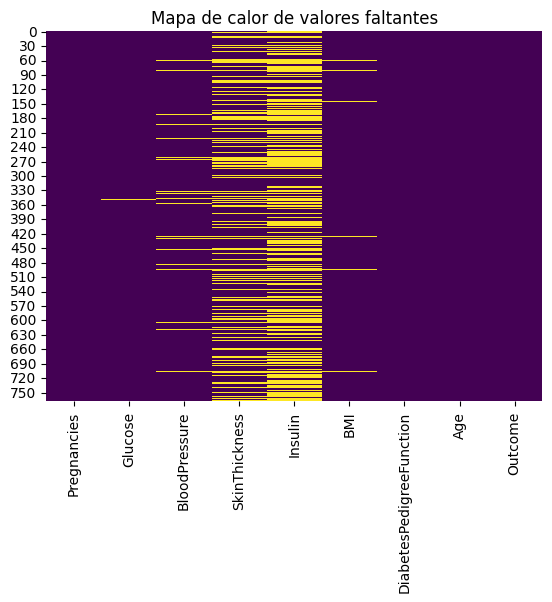

In [126]:
# Visualizamos los valores faltantes
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Mapa de calor de valores faltantes")
plt.show()

In [127]:
# Definir el imputador con k vecinos (por ejemplo, k=3)
imputador_knn = KNNImputer(n_neighbors=5)

# Aplicar imputación
df_imputado = imputador_knn.fit_transform(df)

# Volver a convertir a DataFrame, ya que fit_transform devuelve un array numpy
df = pd.DataFrame(df_imputado, columns=df.columns)

/tmp/ipykernel_2884/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_2884/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


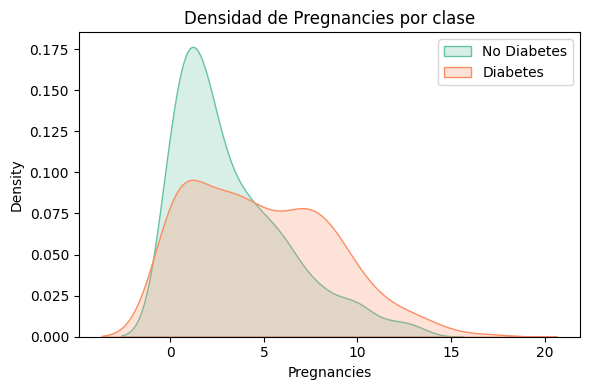

/tmp/ipykernel_2884/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_2884/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


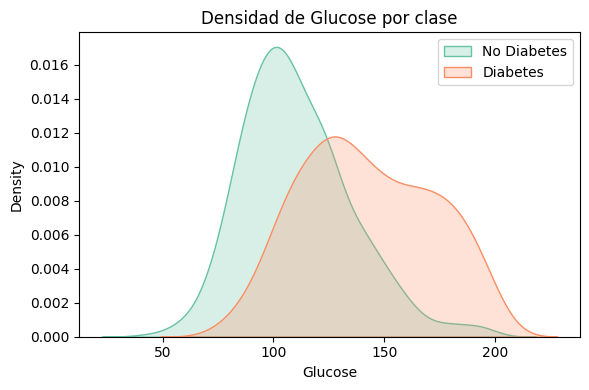

/tmp/ipykernel_2884/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_2884/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


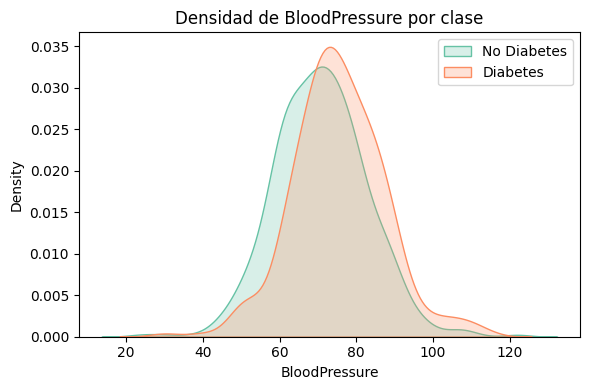

/tmp/ipykernel_2884/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_2884/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


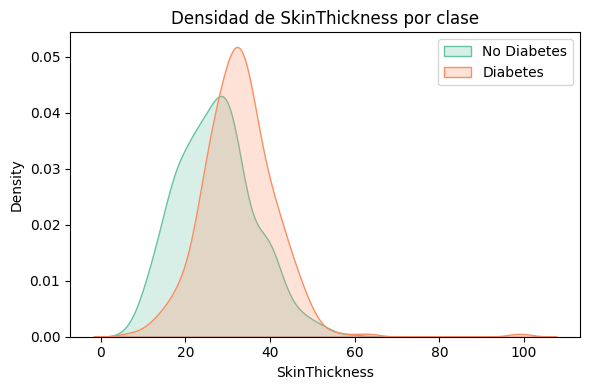

/tmp/ipykernel_2884/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_2884/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


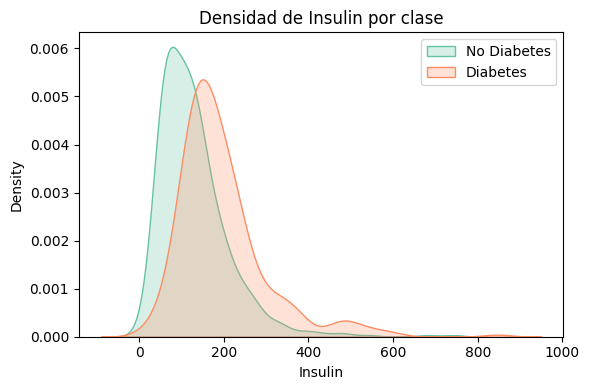

/tmp/ipykernel_2884/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_2884/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


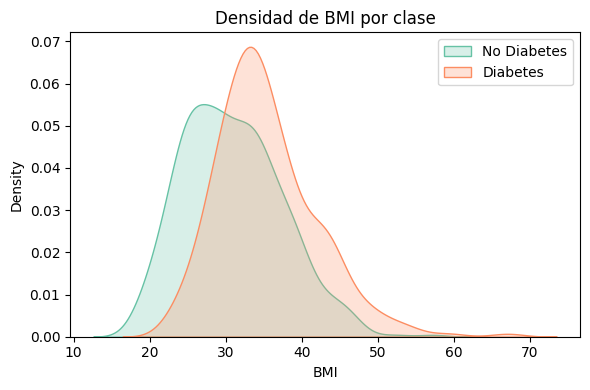

/tmp/ipykernel_2884/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_2884/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


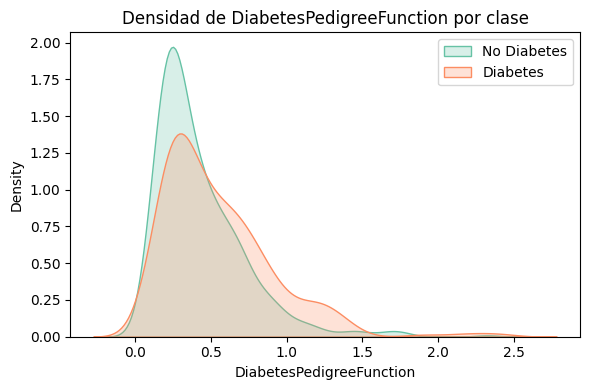

/tmp/ipykernel_2884/3459231447.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
/tmp/ipykernel_2884/3459231447.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')


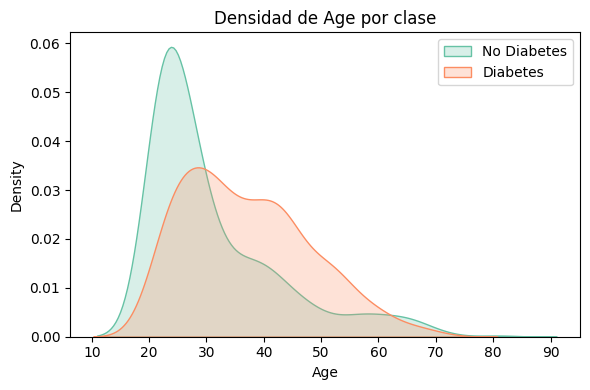

In [128]:
todas_las_columnas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for columna in todas_las_columnas:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=df[df['Outcome'] == 0], x=columna, label='No Diabetes', shade=True, color='#66c2a5')
    sns.kdeplot(data=df[df['Outcome'] == 1], x=columna, label='Diabetes', shade=True, color='#fc8d62')
    plt.title(f'Densidad de {columna} por clase')
    plt.xlabel(columna)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [129]:
# Distribución de la bariable objetivo
print(df['Outcome'].value_counts(normalize=True))

Outcome
0.0    0.651042
1.0    0.348958
Name: proportion, dtype: float64


In [130]:
# Selección X e y
X = df.drop('Outcome', axis=1)
y = df['Outcome']

In [131]:
# Divsión entre grupo de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y) # stratify=y asegura que la proporción de clases se mantenga similar en ambos subconjuntos

# Entrenamiento Random Forest

In [132]:
# Modelo base de Random Forest
modelo_rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    class_weight='balanced',
    random_state=42
)

In [133]:
modelo_rf.fit(X_train, y_train)
y_pred_rf = modelo_rf.predict(X_test)

In [134]:
# Evaluación del modelo
print('Random Forest:\n')
print(classification_report(y_test, y_pred_rf))

Random Forest:

              precision    recall  f1-score   support

         0.0       0.77      0.83      0.80       100
         1.0       0.63      0.54      0.58        54

    accuracy                           0.73       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.72      0.73      0.72       154



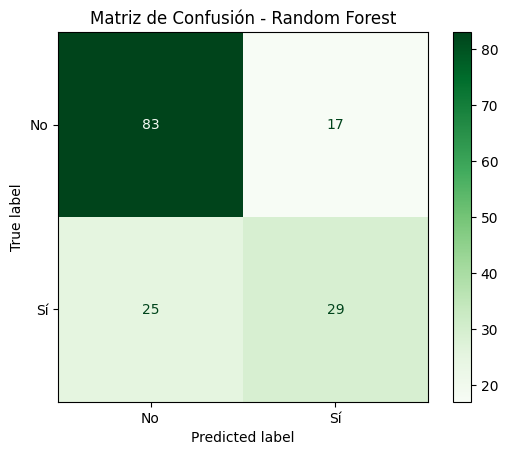

In [135]:
ConfusionMatrixDisplay.from_estimator(modelo_rf, X_test, y_test, display_labels=['No', 'Sí'], cmap='Greens')
plt.title('Matriz de Confusión - Random Forest')
plt.show()

In [136]:
# Búsqueda de hiperparámetros con GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

In [137]:
grid_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='recall',
    cv=5,
    n_jobs=-1
)

In [138]:
grid_rf.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'class_weight': ['balanced'], 'max_depth': [5, 10, ...], 'min_samples_leaf': [1, 2], 'min_samples_split': [2, 5], ...}"
,scoring,'recall'
,n_jobs,-1
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [139]:
print('Mejores hiperparámetros:', grid_rf.best_params_)
print('Mejor resultado de validación cruzada (recall):', grid_rf.best_score_)

Mejores hiperparámetros: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Mejor resultado de validación cruzada (recall): 0.7475083056478404


In [140]:
# Evaluación final del mejor modelo
mejor_rf = grid_rf.best_estimator_
y_pred_opt_rf = mejor_rf.predict(X_test)

In [141]:
print('Reporte del modelo optimizado:\n')
print(classification_report(y_test, y_pred_opt_rf))

Reporte del modelo optimizado:

              precision    recall  f1-score   support

         0.0       0.80      0.73      0.76       100
         1.0       0.57      0.67      0.62        54

    accuracy                           0.71       154
   macro avg       0.69      0.70      0.69       154
weighted avg       0.72      0.71      0.71       154



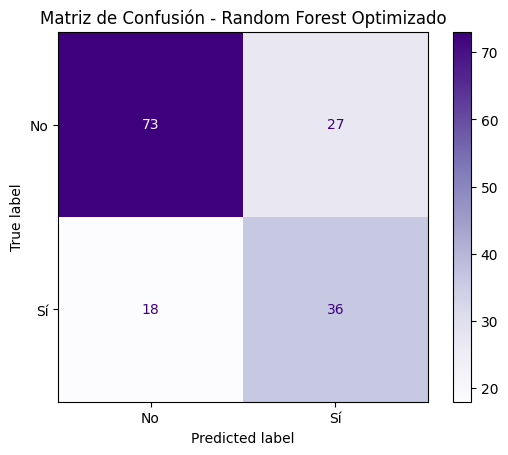

In [142]:
ConfusionMatrixDisplay.from_estimator(mejor_rf, X_test, y_test, display_labels=['No', 'Sí'], cmap='Purples')
plt.title('Matriz de Confusión - Random Forest Optimizado')
plt.show()

In [143]:
# Análisis visual del impacto de hiperparámetros probando con distintas combinaciones de hiperparámetros
valores_estimators = [10, 50, 100, 150]
valores_max_depth = [3, 5, 10, None]

resultados = []

for n in valores_estimators:
    for d in valores_max_depth:
        modelo = RandomForestClassifier(n_estimators=n, max_depth=d, class_weight='balanced', random_state=42)
        modelo.fit(X_train, y_train)
        y_pred = modelo.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        resultados.append({
            'n_estimators': n,
            'max_depth': 'None' if d is None else d,
            'accuracy': acc
        })

df_resultados = pd.DataFrame(resultados)

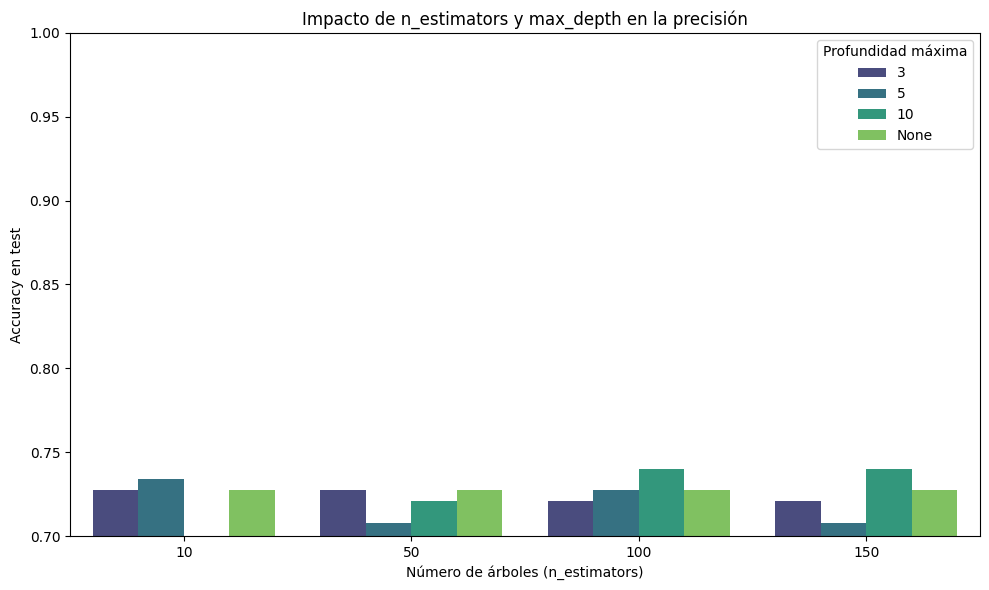

In [144]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df_resultados, x='n_estimators', y='accuracy', hue='max_depth', palette='viridis')
plt.title('Impacto de n_estimators y max_depth en la precisión')
plt.ylabel('Accuracy en test')
plt.xlabel('Número de árboles (n_estimators)')
plt.legend(title='Profundidad máxima')
plt.ylim(0.7, 1.0)
plt.tight_layout()
plt.show()

El uso de Random Forest ha mejorado el rendimiento respecto al árbol de decisión. Mediante GRidSearch se ha encontrado la combinación óptima de hiperparámetros con un recall promedio de 0.7475 en validación cruzada.
En el análisis visual de precisión se ve que el aumento de árboles mejora el desempeño aunque se registren rendimiento decrecientes a patir de cierto punto.
En comparación, el usp de un Random Forest ha proporcionado una mayor estabilidad en el rendimiento.

# Guardar modelo

In [145]:
joblib.dump(mejor_rf, "modelo_random_forest_optimo.pkl")

['modelo_random_forest_optimo.pkl']